In [47]:
#Import librairies
import numpy as np
import matplotlib.pyplot as plt

#Import the module and make it reload each time there is a change 
import importlib
import double_exo
importlib.reload(double_exo)

<module 'double_exo' from '/run/netsop/u/home-sam/home/aloyens/Internship_CACOLAC/sim_models/First_sim_CACOLAC/double_exo.py'>

#### Reminder of the general model

\begin{cases}
\dot{x} = g(x)x - f(x,y)y\\ 
\dot{y} = \gamma f(x,y) y - m(x,y)y\\
x(nT^{+}) = x(nT) - E_xh_x(x(nT))\\
y(nT^{+}) = y(nT) - E_yh_y(y(nT))\\
\end{cases} 

The aim is to compare the efficiency of two different models with exogenous mortality on pests $x$.  
There are two criteria for the comparison: the number of pests accumulated during the period (represented by the integral of $x$ at equilibrium/periodic solution); and the time for $x$ to reach an $\epsilon$ value starting from the same value.

In [48]:
#Fixed parameters
r = 0.5
K = 10 
a = 0.1
m = 0.1
gamma = 0.8

E_inf = r - 0.1 # E < r
E_sup = r + 0.1 # E > r
T = 5

t_0 = 0
t_n = 100

tt = 1 #just to not have a missing argument t when we solve models

# 1 Presence of pests $x$ only

#### Continuous model

\begin{cases}
\dot{x} = [r(1-\frac{x}{K})y- E_x]x- f(x,y) \times y\\ 
\dot{y} = \gamma f(x,y)\times y - m(x,y) \times y\\
x(nT^{+}) = x(nT) - E_x \times 0\\
y(nT^{+}) = y(nT) - E_y \times 0\\
\end{cases}  
with $y_0 = 0$

#### Impulsive model

\begin{cases}
    \dot{x} = [r(1-\frac{x}{K})y- E_x]x- f(x,y) \times y\\ 
    \dot{y} = \gamma f(x,y)\times y - m(x,y) \times y\\
    x(nT^{+}) = x(nT) - (1 - e^{-E_xT})x(nT)\\
    y(nT^{+}) = y(nT) - E_y \times 0
\end{cases}
with $y_0 = 0$

$y_0 = 0$ makes that for any functions $f$ and $m$, $y$ stays at $0$

## 1.1 First criterium : integral of $x$ at equilibrium for the continuous model and at periodic solution for the impulsive solution.

In [49]:
#Inital value of the periodic solution
E_tilde = 1 - np.exp(-E_inf*T)
x_p_0 = ( ( np.exp(r*T) * (1 - E_tilde) - 1 ) * K ) / ( np.exp(r*T) - 1 )

#Inital value of the equilibrium
x_star = K * (1 - E_inf/r)

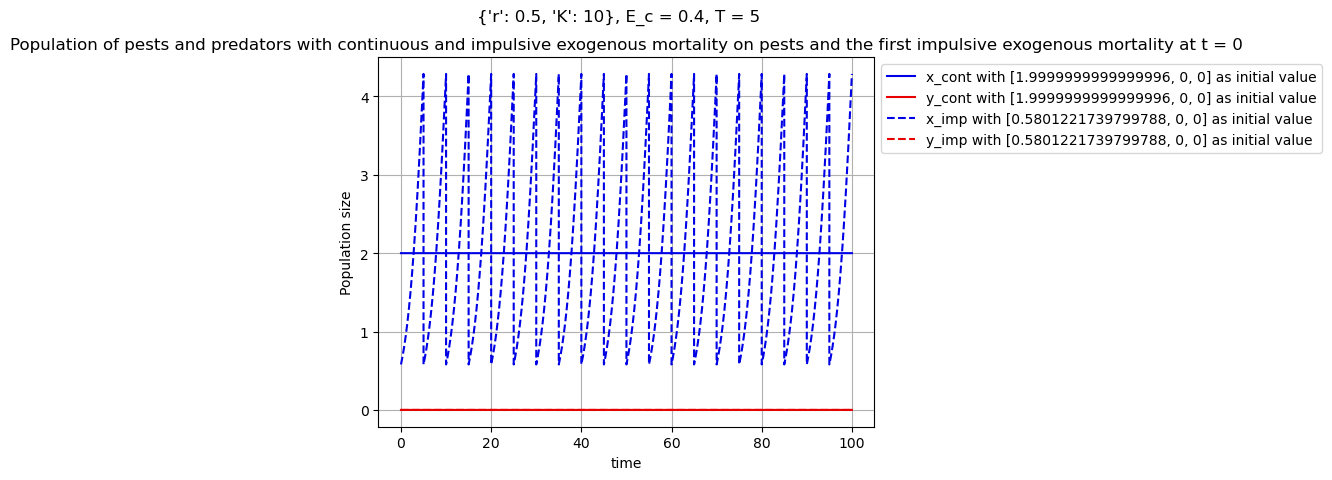

{'T': 5,
 'I_cont_final': 199.99999999999991,
 'I_imp_final': 200.00001868475857,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': None,
 't_eta_imp': None}

In [50]:
double_exo.compare_cont_imp_proportional_mortality_on_x_T(
    xyI0_imp = [x_p_0,0,0],
    xyI0_cont = [x_star,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_inf,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    plot_population=True
)

## 1.2 Second criterium : time to reach $\epsilon$ starting from the same initial value

To have eradication, we always set $E_c > r$

First exogenous mortality event at $ t=T $

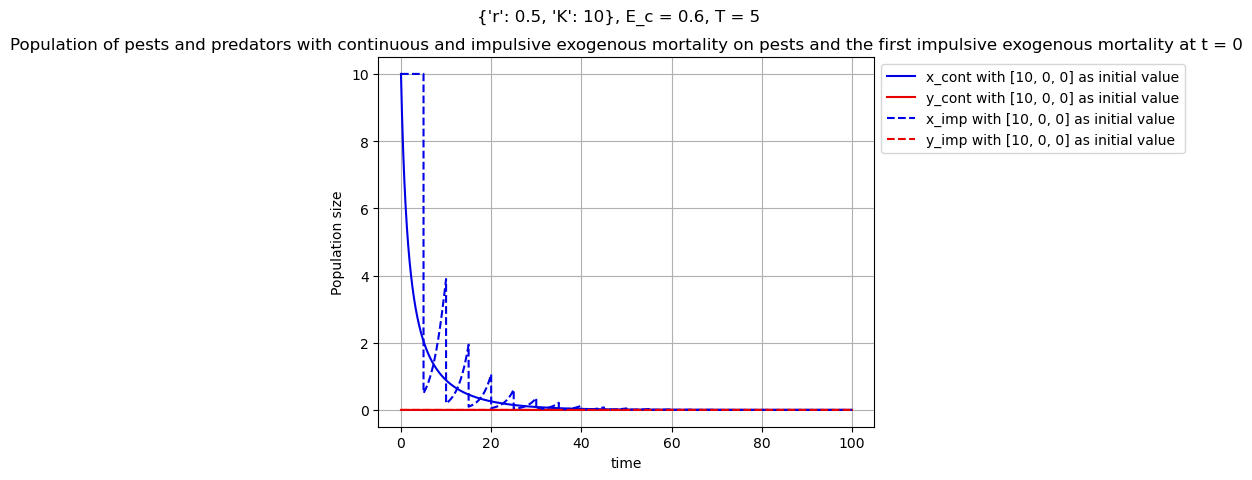

{'T': 5,
 'I_cont_final': 35.83443279398012,
 'I_imp_final': 67.63280876199002,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': 51.25,
 't_eta_imp': 65.0,
 't_eta_imp - t_eta_cont': 13.75}

In [51]:
double_exo.compare_cont_imp_proportional_mortality_on_x_T(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    plot_population=True
)

First exogenous mortality event at $t=0$

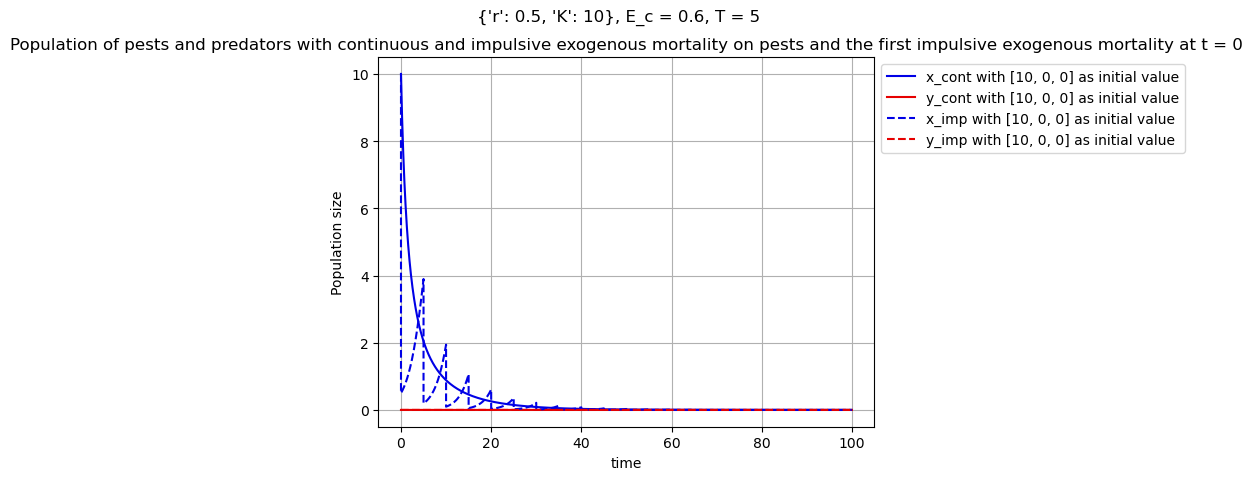

{'T': 5,
 'I_cont_final': 35.83443279398012,
 'I_imp_final': 17.633153662017758,
 'eps': 0.01,
 't_pulse': 0,
 't_eta_cont': 51.25,
 't_eta_imp': 60.0,
 't_eta_imp - t_eta_cont': 8.75}

In [52]:
double_exo.compare_cont_imp_proportional_mortality_on_x_0(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    plot_population=True
)

First exogenous mortality event at $t=2.5$ (for example)

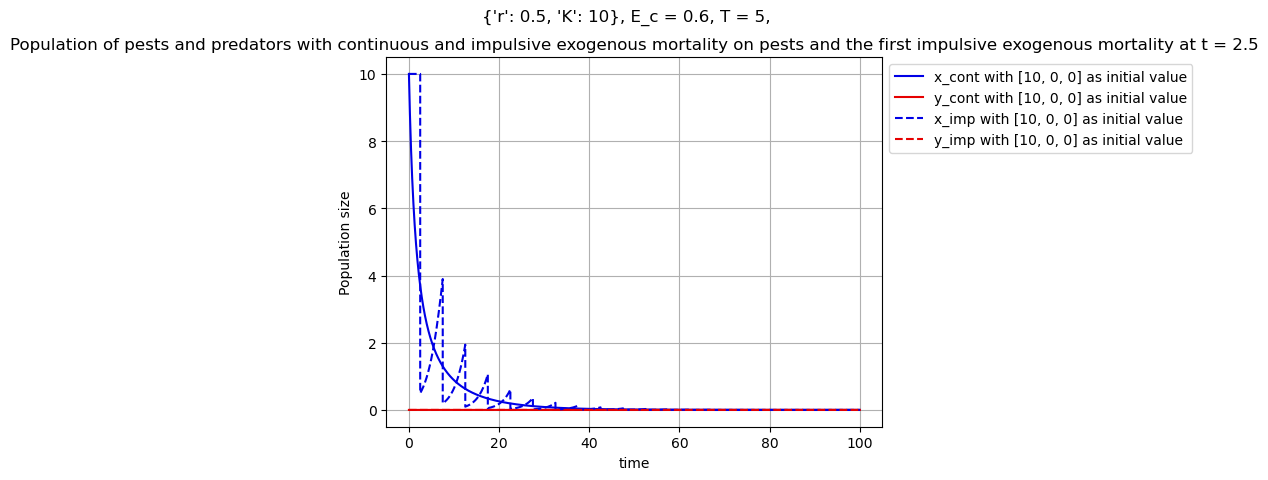

{'T': 5,
 'I_cont_final': 35.83443297660491,
 'I_imp_final': 42.63288423326491,
 'eps': 0.01,
 't_pulse': 2.5,
 't_eta_cont': 51.25,
 't_eta_imp': 62.5,
 't_eta_imp - t_eta_cont': 11.25}

In [53]:
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp= [K,0,0],
    xyI0_cont= [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=2.5,
    eps=0.01,
    plot_population=True
)

# 2 Presence of both pests $x$ and predators $y$

## 2.1 First criterium : integral of $x$ at equilibrium for the continuous model and at periodic solution for the impulsive solution.

## 2.2 Second criterium : time to reach $\epsilon$ starting from the same initial value

In [54]:
#Same initial value
xyI0 = [K, 0.1, 0]

First exogenous mortality event at $t=T$

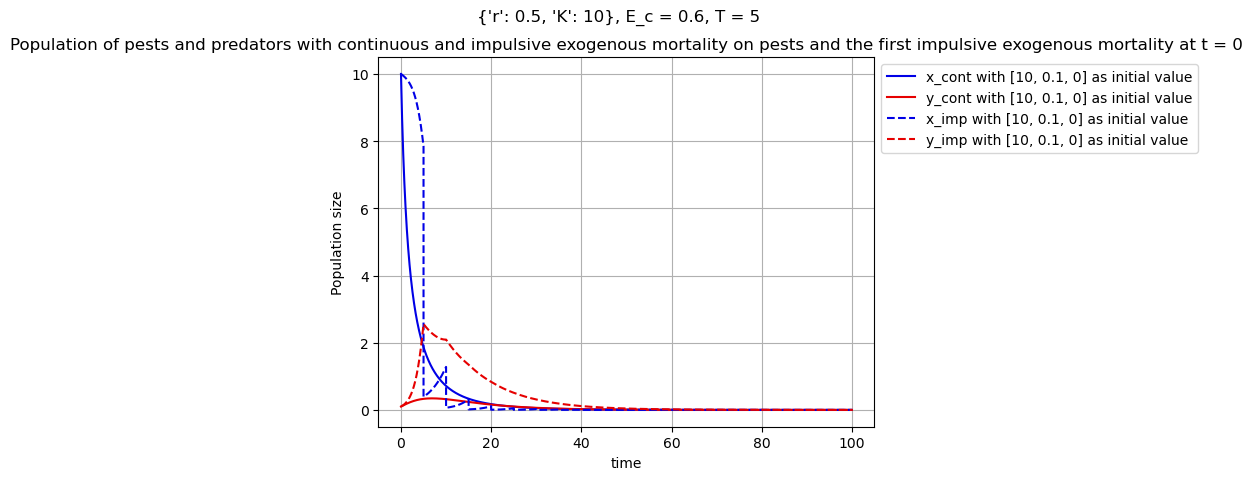

{'T': 5,
 'I_cont_final': 32.233491452521854,
 'I_imp_final': 51.74239973433285,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': 46.25,
 't_eta_imp': 35.0,
 't_eta_imp - t_eta_cont': -11.25}

In [55]:
double_exo.compare_cont_imp_proportional_mortality_on_x_T(
    xyI0_imp = xyI0,
    xyI0_cont = xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    plot_population=True
)

First exogenous mortality event at $t=0$

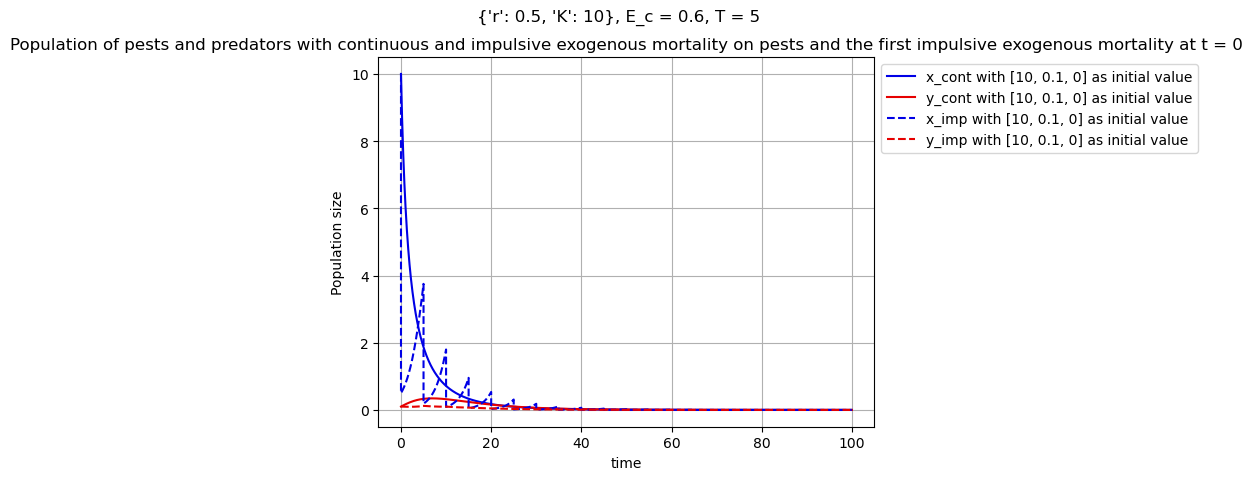

{'T': 5,
 'I_cont_final': 32.233491452521854,
 'I_imp_final': 16.582298948806628,
 'eps': 0.01,
 't_pulse': 0,
 't_eta_cont': 46.25,
 't_eta_imp': 55.0,
 't_eta_imp - t_eta_cont': 8.75}

In [56]:
double_exo.compare_cont_imp_proportional_mortality_on_x_0(
    xyI0_imp = xyI0,
    xyI0_cont = xyI0,
    t=tt,
    gamma=gamma,
    E_c=E_sup,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    eps=0.01,
    plot_population=True
)